<a href="https://colab.research.google.com/github/RylieWeaver9/Teaching-Python-Digital-Learning-Lab-/blob/main/DLL_Advanced_Session.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome to 'Strangle the Code - Python Workshop'**

## Hosted By: Rylie Weaver w/ the Digital Learning Lab
## Method: Google Colaboratory
## Topics: Advanced Data Analysis, Beginner Regression
## Level: **Advanced**

### This will have basic examples for basic sets. How to upload and read bigger sets is advanced session.

# Data Analysis

## Get Data

Put in google drive

## Load In Data

We'll be using the famous and widely-used beginner dataset, the california housing dataset.

Read carefully... in groups of district!

### Import drive

In [5]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Read the data

In [6]:
import pandas as pd

file_path = '/content/drive/MyDrive/DLL_Data/housing.csv'
data = pd.read_csv(file_path)

In [7]:
print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [18]:
data.shape

(20640, 10)

In [21]:
data["longitude"]

0       -122.23
1       -122.22
2       -122.24
3       -122.25
4       -122.25
          ...  
20635   -121.09
20636   -121.21
20637   -121.22
20638   -121.32
20639   -121.24
Name: longitude, Length: 20640, dtype: float64

In [11]:
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [13]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Visualize the Data

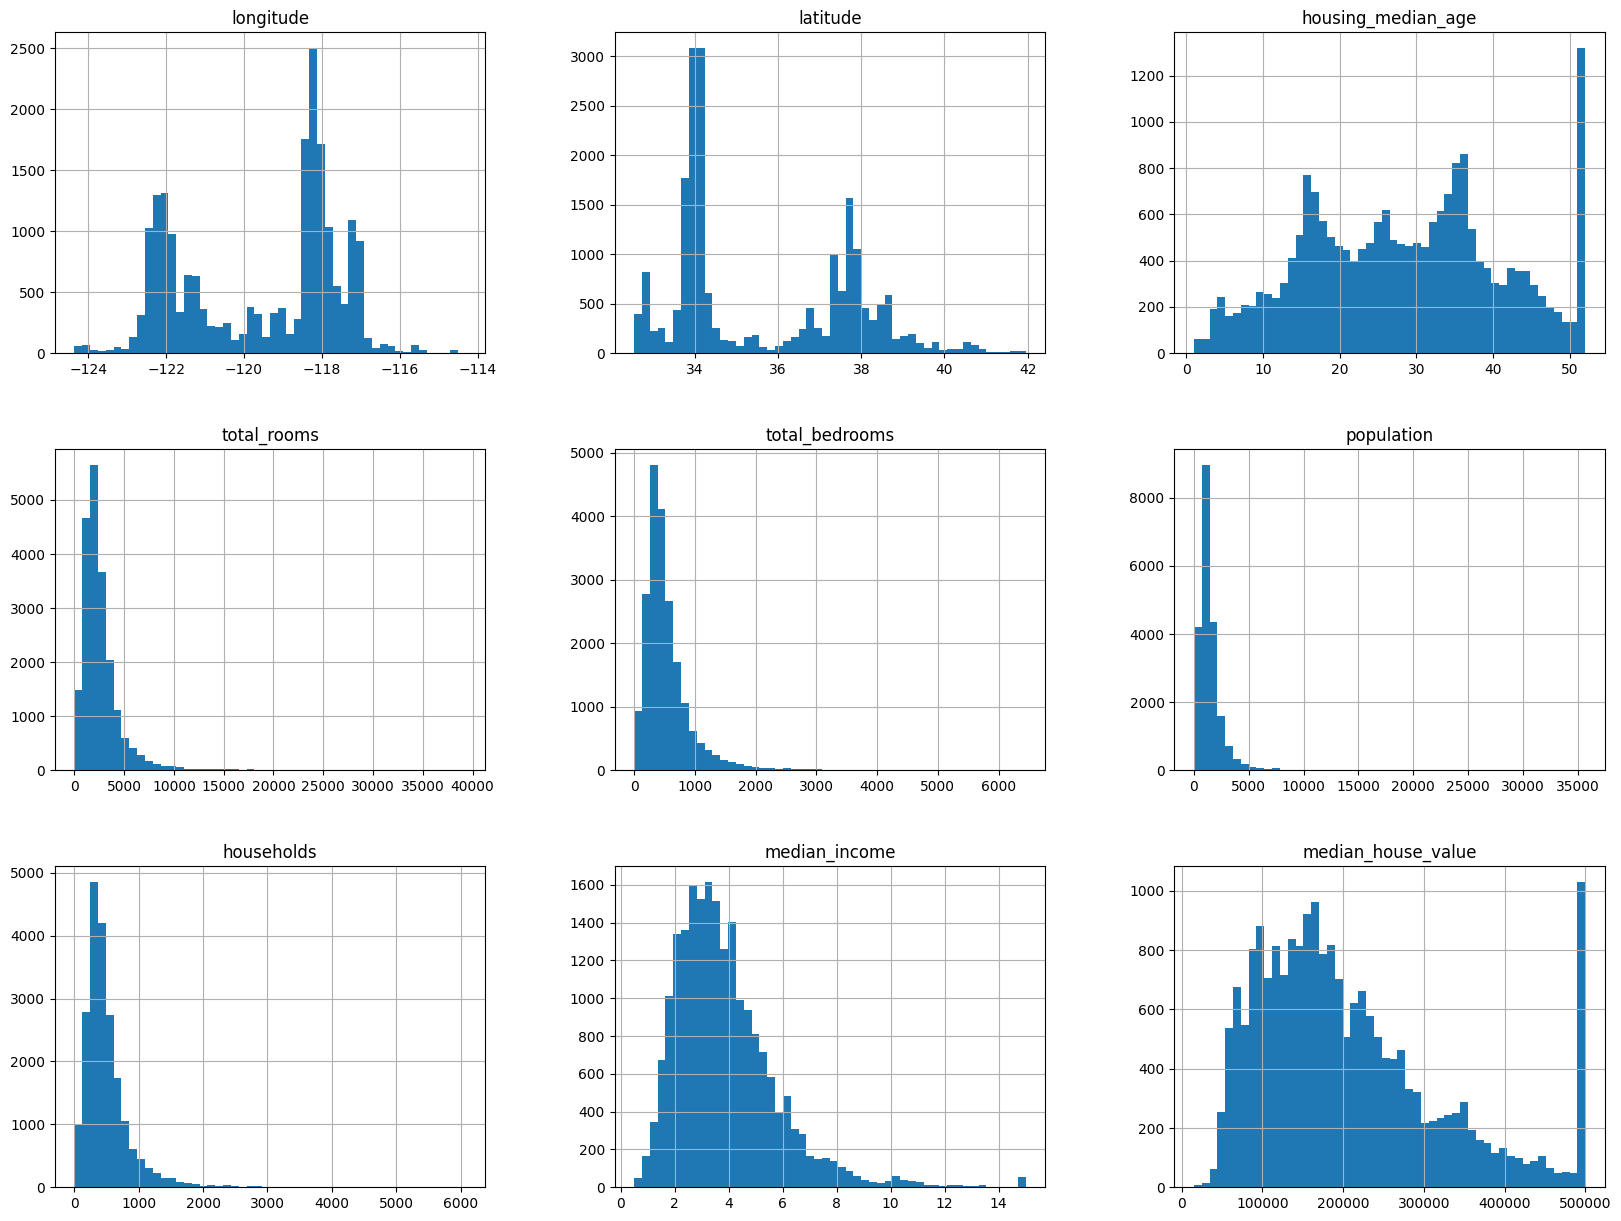

In [14]:
import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(20,15))

plt.show()

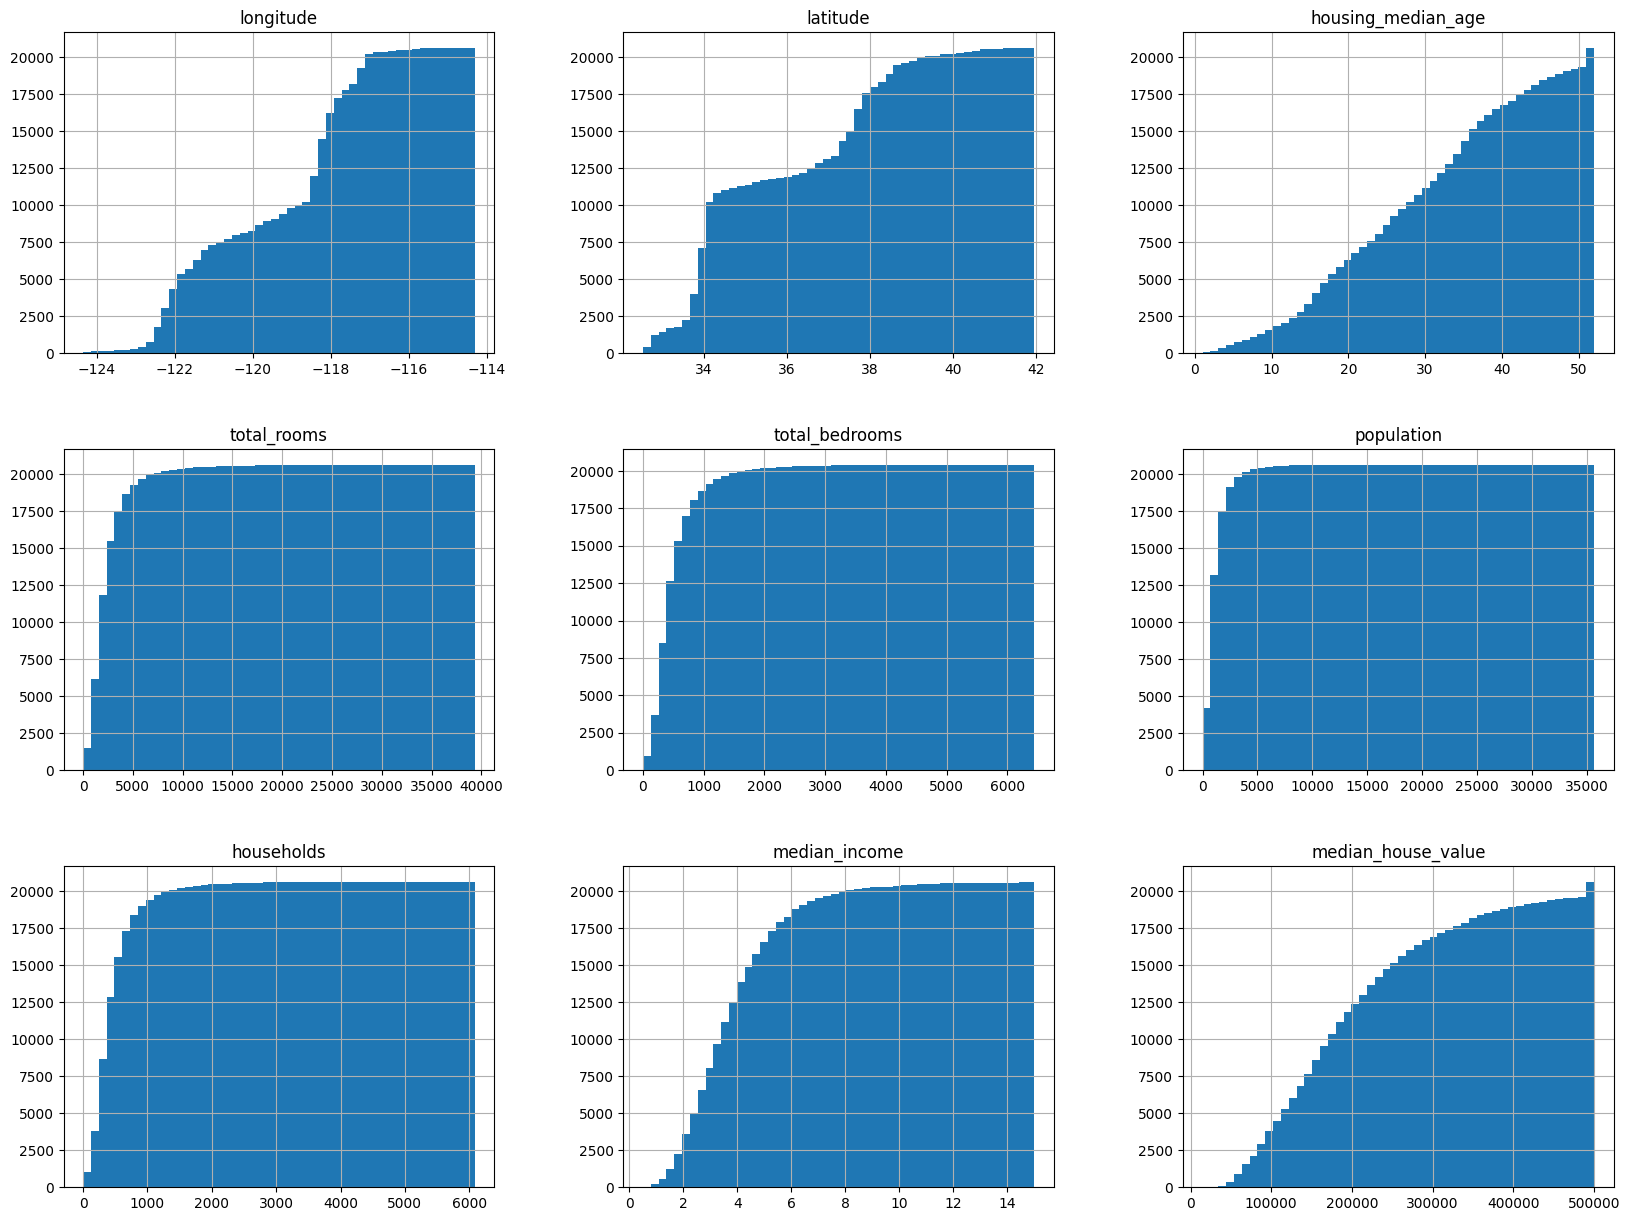

In [16]:
import matplotlib.pyplot as plt

data.hist(bins=50, cumulative=True, figsize=(20,15))

plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

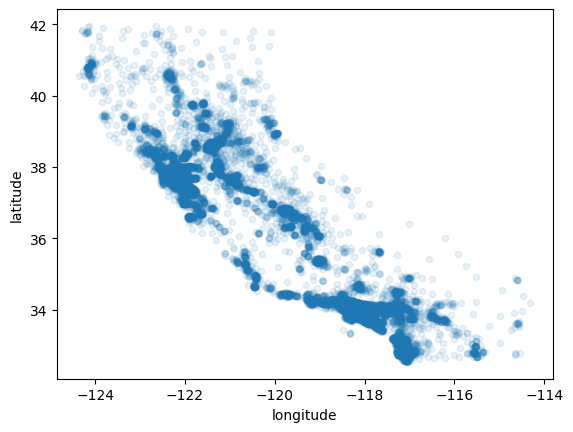

In [22]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

<Axes: xlabel='total_rooms', ylabel='total_bedrooms'>

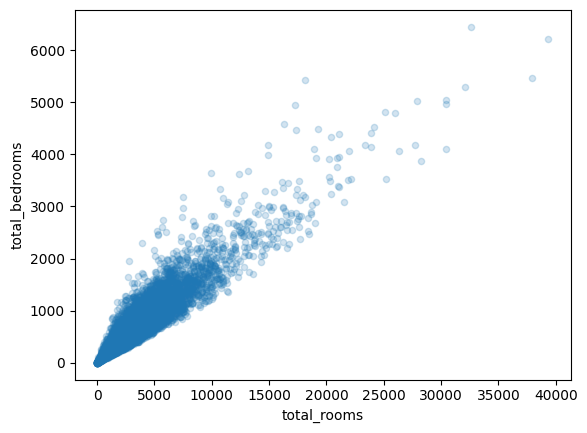

In [26]:
data.plot(kind="scatter", x="total_rooms", y="total_bedrooms", alpha=0.2)

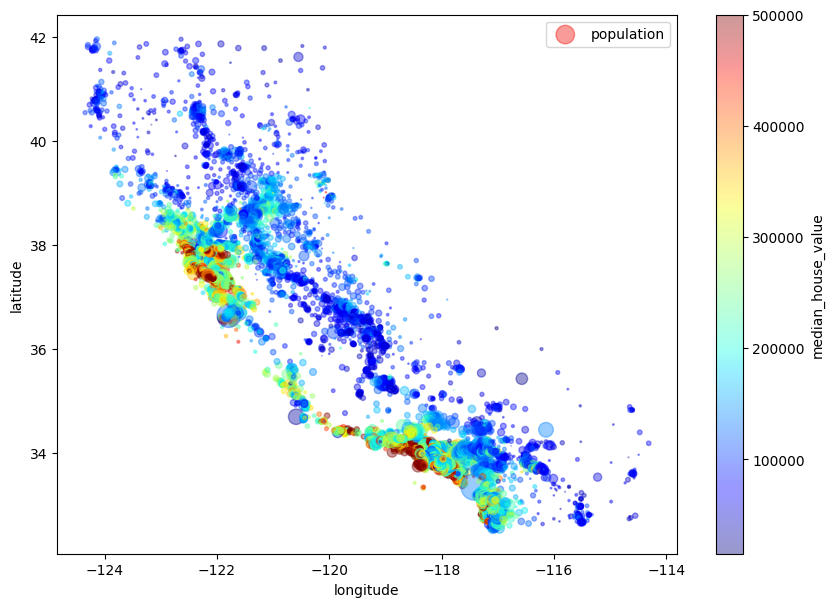

In [28]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=data["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

### Note that like much of computer science, I'm adapting someone else's work. Check out this link! https://github.com/ageron/handson-ml2

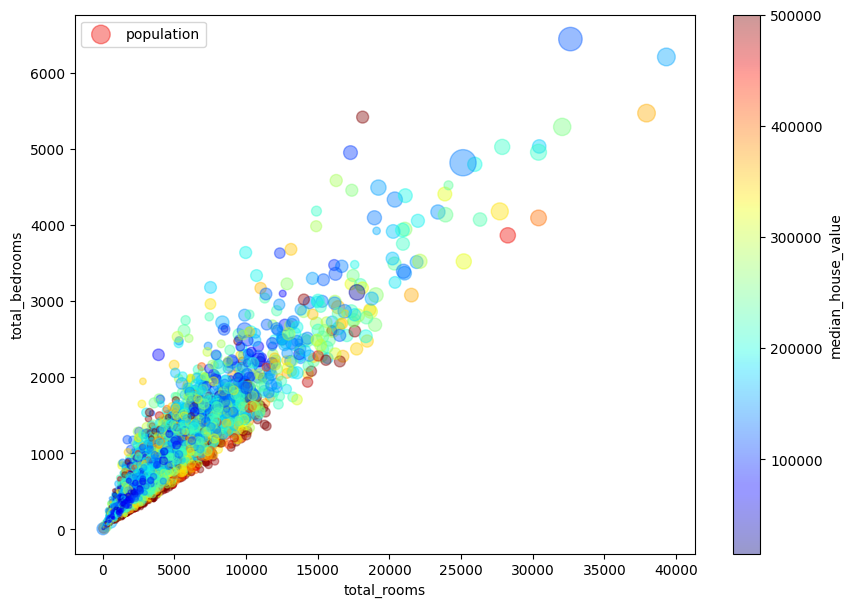

In [29]:
data.plot(kind="scatter", x="total_rooms", y="total_bedrooms", alpha=0.4,
             s=data["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

## Analyze the Data

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='total_bedrooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='total_bedrooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='total_bedrooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms

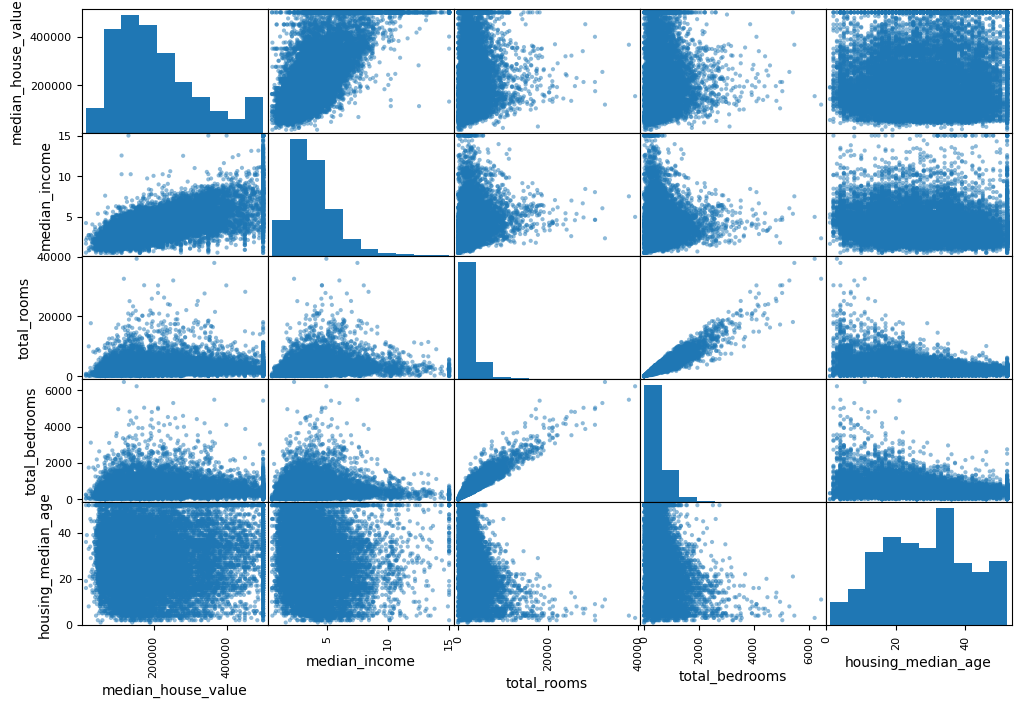

In [33]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "total_bedrooms",
              "housing_median_age"]
scatter_matrix(data[attributes], figsize=(12, 8))

array([[<Axes: xlabel='bedrooms_per_household', ylabel='bedrooms_per_household'>,
        <Axes: xlabel='rooms_per_household', ylabel='bedrooms_per_household'>,
        <Axes: xlabel='median_house_value', ylabel='bedrooms_per_household'>],
       [<Axes: xlabel='bedrooms_per_household', ylabel='rooms_per_household'>,
        <Axes: xlabel='rooms_per_household', ylabel='rooms_per_household'>,
        <Axes: xlabel='median_house_value', ylabel='rooms_per_household'>],
       [<Axes: xlabel='bedrooms_per_household', ylabel='median_house_value'>,
        <Axes: xlabel='rooms_per_household', ylabel='median_house_value'>,
        <Axes: xlabel='median_house_value', ylabel='median_house_value'>]],
      dtype=object)

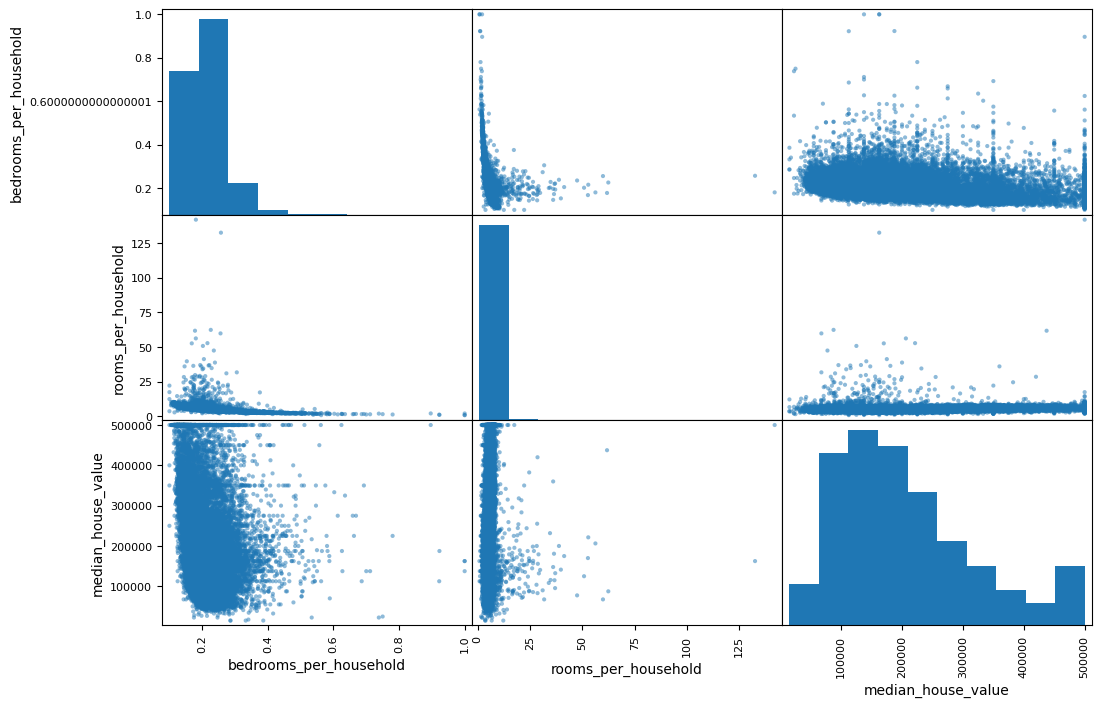

In [41]:
data["rooms_per_household"] = data["total_rooms"]/data["households"]
data["bedrooms_per_household"] = data["total_bedrooms"]/data["total_rooms"]

new_attributes = ["bedrooms_per_household", "rooms_per_household", "median_house_value"]
scatter_matrix(data[new_attributes], figsize=(12, 8))

# Beginner Regression

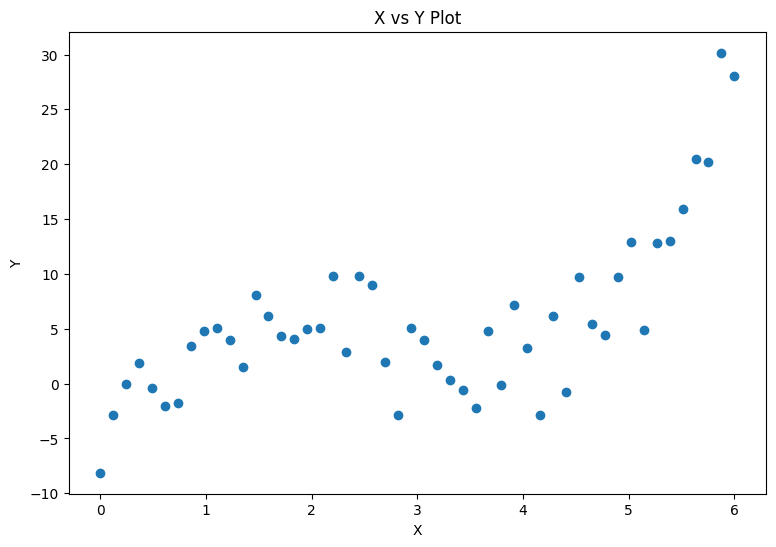

In [42]:
import numpy as np

# Generate an independent variable
# range [0, 6], 50 points
num_pts = 50
x = np.linspace(0, 6, num_pts)
X = np.array(x).reshape(-1,1)

# Generate a normally distributed error
# mean=0, var=3, 50 points
e = np.random.normal(0, 3, num_pts)
E = np.array(e).reshape(-1,1)

# Generate dependent variable (3rd degree polynomial)
Y = X**3 - 8*(X**2) + 18*X - 6 + E

# Plot
plt.figure(figsize = (9,6))
plt.scatter(X,Y)

# Label plot
plt.title('X vs Y Plot')
plt.xlabel('X')
plt.ylabel('Y')

# Show
plt.show()

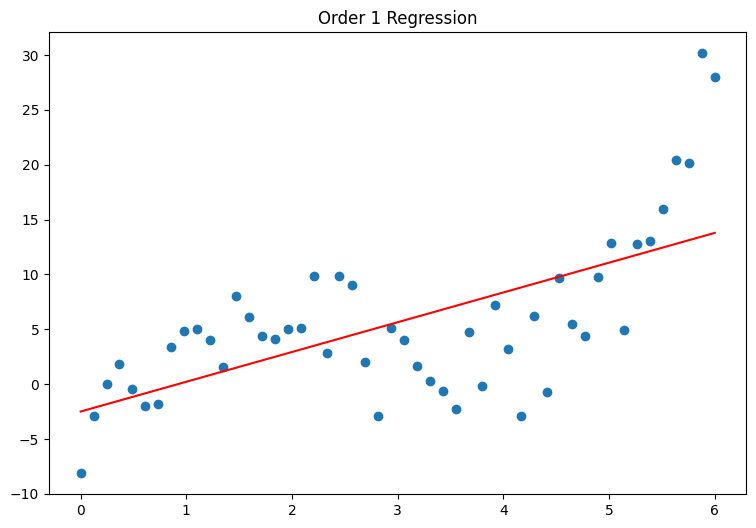

In [54]:
from sklearn.linear_model import LinearRegression

# Select The Model and Train
model1 = LinearRegression()
model1.fit(X, Y)

# Plot
plt.figure(figsize = (9,6))
plt.plot(X, model1.predict(X), 'r')
plt.scatter(X, Y)

# Label plots
plt.title('Order 1 Regression')
plt.xlabel = ('X')
plt.ylabel = ('Y')

#Show
plt.show()

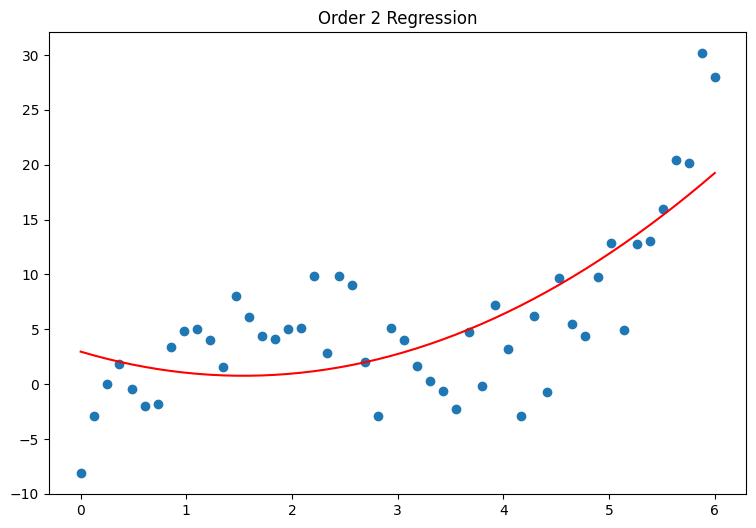

In [47]:
from sklearn.preprocessing import PolynomialFeatures

# Make Polynomial Array
X_poly2 = PolynomialFeatures(2)
data2 = X_poly2.fit_transform(X)

# Select The Model and Train
model2 = LinearRegression()
model2.fit(data2, Y)

# Plot
plt.figure(figsize = (9,6))
plt.plot(X, model2.predict(data2), 'r')
plt.scatter(X, Y)

# Label plots
plt.title('Order 2 Regression')
plt.xlabel = ('X')
plt.ylabel = ('Y')

#Show
plt.show()

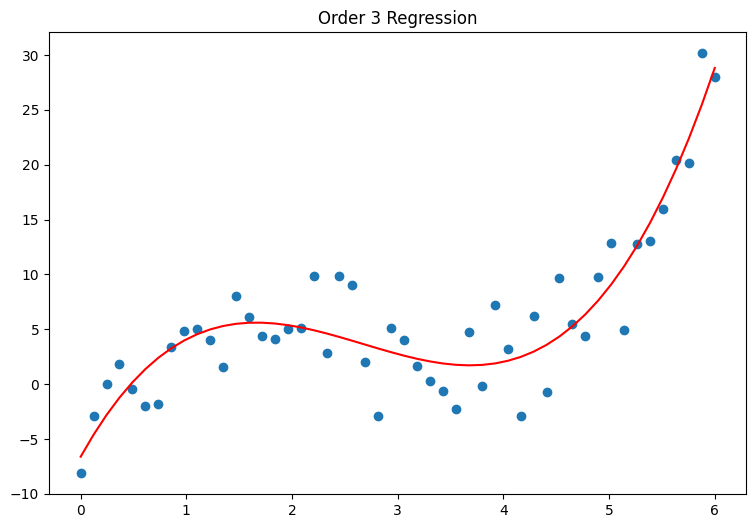

In [51]:
# Make Polynomial Array
X_poly3 = PolynomialFeatures(3)
data3 = X_poly3.fit_transform(X)

# Select The Model and Train
model3 = LinearRegression()
model3.fit(data3, Y)

# Plot
plt.figure(figsize = (9,6))
plt.plot(X, model3.predict(data3), 'r')
plt.scatter(X, Y)

# Label plots
plt.title('Order 3 Regression')
plt.xlabel = ('X')
plt.ylabel = ('Y')

#Show
plt.show()